<a href="https://colab.research.google.com/github/obaidur2020/Data-Science/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

In [18]:
url='https://raw.githubusercontent.com/obaidur2020/Data-Science/master/heart.csv'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [20]:
df.shape 

(303, 14)

In [21]:
df.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0


In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
df.cp.value_counts().sort_index()

0    143
1     50
2     87
3     23
Name: cp, dtype: int64

In [28]:
conditions = [
(df['age'] >= 63),
(df['age'] <= 41)
]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating)
fpie=df.rating.value_counts()
df.rating.value_counts()

0       214
good     60
bad      29
Name: rating, dtype: int64

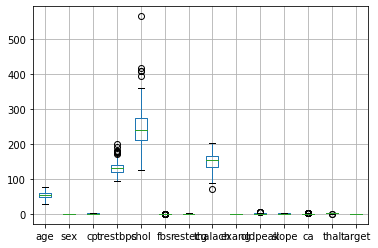

In [30]:
df.boxplot( )

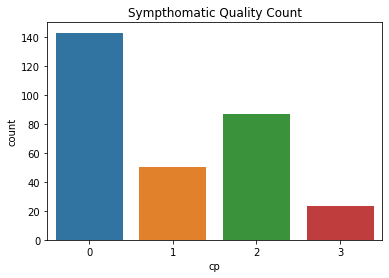

In [31]:
sns.countplot(x='cp',data=df)
plt.title('Sympthomatic Quality Count')
plt.show()

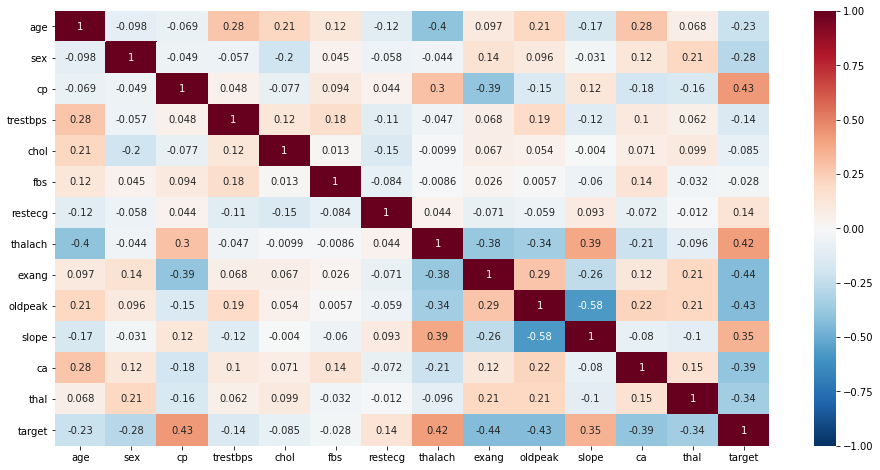

In [32]:
#Generating Heatmap
correlation = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [36]:
df.isnull().any() 


age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
rating      False
dtype: bool

In [40]:
X = df.iloc[:,:13].values 
y = df["target"].values 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rating
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,good
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,bad
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,bad
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,good
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [42]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 ) 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rating
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,good
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,bad
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,bad
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,good
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [45]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rating
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,good
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,bad
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,bad
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,good
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [52]:
classifier = Sequential() 
classifier.add(Dense(activation = "relu", input_dim = 13, 
					units = 8, kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "relu", units = 14, 
					kernel_initializer = "uniform")) 
classifier.add(Dense(activation = "sigmoid", units = 1, 
					kernel_initializer = "uniform")) 
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
				metrics = ['accuracy'] ) 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rating
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,good
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,bad
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,bad
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,good
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [53]:
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100 ) 
df

Epoch 1/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5613
Epoch 2/100
27/27 [==============================] - 0s 999us/step - loss: 0.6884 - accuracy: 0.7217
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.8396
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.8302
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.8396
Epoch 6/100
27/27 [==============================] - 0s 995us/step - loss: 0.4563 - accuracy: 0.8443
Epoch 7/100
27/27 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8538
Epoch 8/100
27/27 [==============================] - 0s 987us/step - loss: 0.3645 - accuracy: 0.8679
Epoch 9/100
27/27 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8726
Epoch 10/100
27/27 [==============================] - 0s 954us/step - loss: 0.3373 - accuracy: 0.8726
E

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rating
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,good
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,bad
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,bad
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,good
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [54]:
y_pred = classifier.predict(X_test) 
y_pred = (y_pred > 0.5) 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rating
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,good
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,bad
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,bad
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,good
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [55]:
cm = confusion_matrix(y_test,y_pred) 
cm 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rating
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,good
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,bad
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,bad
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,good
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [56]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1]) 
print(accuracy*100) 
df

83.51648351648352


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rating
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,good
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,bad
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,bad
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,good
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0
